<a href="https://colab.research.google.com/github/sveta6/FindMe/blob/main/3_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

предобработка данных

In [ ]:
data = pd.read_csv("/content/spam.csv", encoding = 'latin-1')
data.drop(data.iloc[:, 2:5], inplace = True, axis = 1)
data.rename(columns={'v1': 'class', 'v2': 'text'}, inplace=True)
data

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


визуализация распределения классов

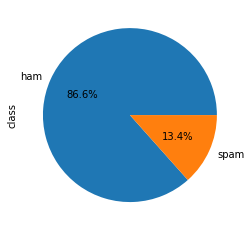

In [ ]:
data['class'].value_counts().plot.pie(autopct='%1.1f%%')

разделение выборки на тестовую и тренировочную

In [ ]:
x = data['text']
y = data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
words = {}
p_spam = 0.5
p_ham = 0.5

In [ ]:
p_spam = y_train.value_counts(normalize=True)['spam']
p_ham = 1 - p_spam
p_word_in_spam = []
p_word = []

In [ ]:
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w\w+\b') 
x = vectorizer.fit_transform(x_train).toarray()
words = vectorizer.get_feature_names_out()
count_word = len(x[0])
count_text = len(x)

In [ ]:
count_word

7704

In [ ]:
count_text

4457

In [ ]:
words

array(['00', '000', '000pes', ..., 'ûïharry', 'ûò', 'ûówell'],
      dtype=object)

In [ ]:
y_train = list(y_train)
p_spam_word = []
for w in range(count_word):
    count, count2 = 0, 0
    for i in range(len(x)):
        if x[i][w] > 0:
            count += 1
            if y_train[i] == 'spam':
                count2 += 1
    p_spam_word.append(count2/count)

наивный байесовский классификатор

In [ ]:
class BayesianСlassification:
    def __init__(self):
        self.words = {}
        self.p_spam = 0.5
        self.p_ham = 0.5
    
    def fit(self, texts, class_, token_pattern=r"(?u)\b\w\w+\b"):
        #self.p_spam = class_.value_counts(normalize=True)['spam']
        self.p_ham = 1 - self.p_spam
        p_word_in_spam = []
        p_word = []
        vectorizer = CountVectorizer(token_pattern=token_pattern) 
        x = vectorizer.fit_transform(texts).toarray()
        words = vectorizer.get_feature_names_out()
        count_word = len(x[0])
        count_text = len(x)
        y = list(class_)
        p_spam_word = []
        for w in range(count_word):
            count, count2 = 0, 0
            for i in range(count_text):
                if x[i][w] > 0:
                    count += 1
                    if y[i] == 'spam':
                        count2 += 1
            p_spam_word.append(count2/count)
        self.words = {words[i]:p_spam_word[i] for i in range(count_word)}

    def comp(self, X):
        p = 1
        for x in X:
            p *= x
        return p

    def spam_word(self, word):
        return self.words.get(word)

    def spam_text(self, text):
        v = CountVectorizer()
        try:
            v.fit_transform([text])
            word = v.get_feature_names_out()
            li = [self.spam_word(w) for w in word if self.spam_word(w) is not None]
            return self.comp(li) / (self.comp(li)  + (self.p_ham / self.p_spam) ** (1 - len(li)) *  self.comp([1 - i for i in li]))
        except:
            return 0.5

    def check(self, x, y):
        tp_count, tn_count, fp_count, spam_count= 0, 0, 0, 0
        x, y = list(x), list(y)
        for i in range(len(y)):
            if self.spam_text(x[i]) > 0.5 and y[i] == 'spam':
                tp_count += 1
                spam_count += 1
            elif self.spam_text(x[i]) <= 0.5 and y[i] == 'ham':
                tn_count += 1
            elif self.spam_text(x[i]) <= 0.5 and y[i] == 'spam':
                fp_count += 1
                spam_count += 1

        self.matrix = [[tp_count / spam_count, tn_count / (len(y) - spam_count)],
                       [fp_count / spam_count, (len(y) - tp_count - tn_count - fp_count) / (len(y) - spam_count)]]
        self.score = (tp_count + tn_count) / len(y)

In [ ]:
bc =  BayesianСlassification()
bc.fit(x_train, y_train)

In [ ]:
bc.spam_text('app anytime to')

0.5982459803716851

In [ ]:
bc.check(x_test, y_test)

In [ ]:
bc.matrix

[[0.6713286713286714, 0.9989711934156379],
 [0.32867132867132864, 0.00102880658436214]]

In [ ]:
bc.score

0.95695067264574